# Straight Line of Stock Histocial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
2017-01-03    11.43
2017-01-04    11.43
2017-01-05    11.24
2017-01-06    11.32
2017-01-09    11.49
Name: Adj Close, dtype: float64

In [3]:
df = dataset.reset_index()

In [4]:
df.head()

,Date,Adj Close
0,2017-01-03,11.43
1,2017-01-04,11.43
2,2017-01-05,11.24
3,2017-01-06,11.32
4,2017-01-09,11.49


In [5]:
df.tail()

,Date,Adj Close
497,2018-12-24,16.650000
498,2018-12-26,17.900000
499,2018-12-27,17.490000
500,2018-12-28,17.820000
501,2018-12-31,18.459999


In [6]:
max_p = df['Adj Close'].max()
min_p = df['Adj Close'].min()
avg_p = df['Adj Close'].mean()

In [16]:
data = df.drop(['Date'], axis=1)
data

,Adj Close
0,11.430000
1,11.430000
2,11.240000
3,11.320000
4,11.490000
5,11.440000
6,11.200000
7,10.760000
8,10.580000
9,9.820000


In [17]:
data = data.reset_index()

In [18]:
data.as_matrix()

array([[  0.        ,  11.43000031],
       [  1.        ,  11.43000031],
       [  2.        ,  11.23999977],
       ...,
       [499.        ,  17.48999977],
       [500.        ,  17.81999969],
       [501.        ,  18.45999908]])

In [8]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [19]:
points = data.as_matrix()

In [20]:
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]


In [21]:
print("Line Equation is y = {m}x + {c}".format(m=m,c=c))


Line Equation is y = 0.021718614923358824x + 9.372574584656498


In [25]:
equation_of_line = print("y = {m}x + {c}".format(m=m,c=c))


y = 0.021718614923358824x + 9.372574584656498


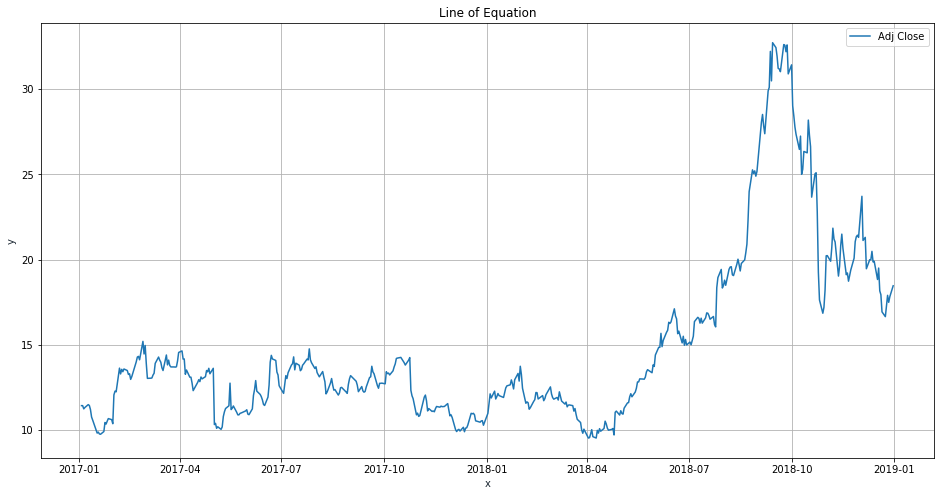

In [28]:
plt.figure(figsize=(16,8))
plt.plot(dataset)
plt.title('Line of Equation', equation_of_line)
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='best')
plt.grid()
plt.show()